## Notebook for testing the pretrained weights for the Pendulum Environment

In [1]:
# Creates the model and loads the desired weights (they need to be in the same directory than the notebook)

import random
import numpy as np
from tensorflow import keras
import gym
env = gym.make('Pendulum-v0')

stateInput        = keras.Input(shape = (3,))    

actorDense1       = keras.layers.Dense(units = 128, activation = "relu")   (stateInput)
actorDense2       = keras.layers.Dense(units = 128, activation = "relu")   (actorDense1)
actorDense3       = keras.layers.Dense(units = 32, activation = "relu")    (actorDense2)
actorOutput       = keras.layers.Dense(units = 1, activation = "tanh")     (actorDense3)

actorModel        = keras.Model (inputs = stateInput, outputs = actorOutput)
actorModel.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss ="mse")
#print (model.summary())
actorModel.load_weights("pendulum2.h5")

In [2]:
# Testing loop (Google colab cannot render the environment, only computations can be done. Render in Local Machine!)

numberOfTestingEpisodes = 5
testingRewards = []

for episode in range (numberOfTestingEpisodes):
    done = False
    episodeReward = 0
    prevObs = env.reset()

    
    for step in range (2010):
        
       
        if done:
            break
        env.render()
        

        actions = actorModel.predict(np.expand_dims(prevObs, axis = 0))[0] # Shape (2,)
        
        obs, reward, done, info = env.step (actions)

        prevObs = obs
        episodeReward += reward

    print (episode, " Episode Reward: ", episodeReward)
    testingRewards.append(episodeReward)
env.close()

0  Episode Reward:  -600.733512176219
1  Episode Reward:  -124.01448751875661
2  Episode Reward:  -250.21051418060273
3  Episode Reward:  -590.7365810794092
4  Episode Reward:  -122.1209972702742


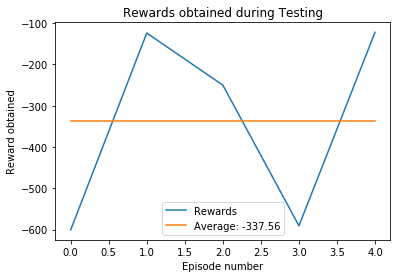

In [3]:
import matplotlib.pyplot as plt
plt.plot (list(range(len(testingRewards))), testingRewards)
plt.plot (list(range(len(testingRewards))), [np.average(testingRewards)]*len(testingRewards))
plt.title("Rewards obtained during Testing")
plt.xlabel("Episode number")
plt.ylabel("Reward obtained")
plt.legend(["Rewards", "Average: %.2f" % np.average(testingRewards)])
plt.show()